In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
with open('../Annotations/fho_sta_train.json') as json_file:
    sta_train_json = json.load(json_file)
with open('../Annotations/fho_sta_val.json') as json_file:
    sta_val_json = json.load(json_file)
with open('../Annotations/fho_sta_test_unannotated.json') as json_file:
    sta_test_json = json.load(json_file)

# Sample Number Distribution


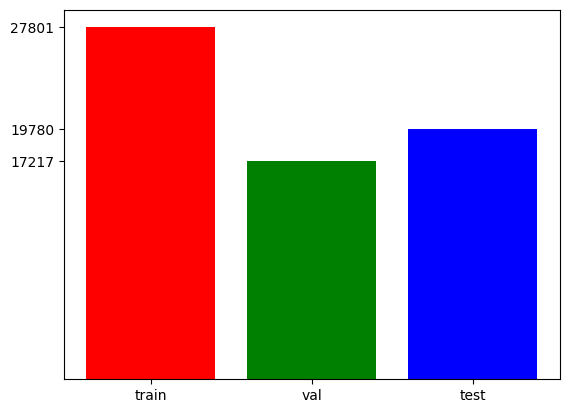

In [3]:
train_length = len(sta_train_json['annotations'])
val_length = len(sta_val_json['annotations'])
test_length = len(sta_test_json['annotations'])
plt.bar([1,2,3], [train_length, val_length, test_length],color=['r','g','b'])
plt.xticks([1,2,3], ['train', 'val', 'test'])
plt.yticks([train_length, val_length, test_length], [train_length, val_length, test_length])
plt.show()

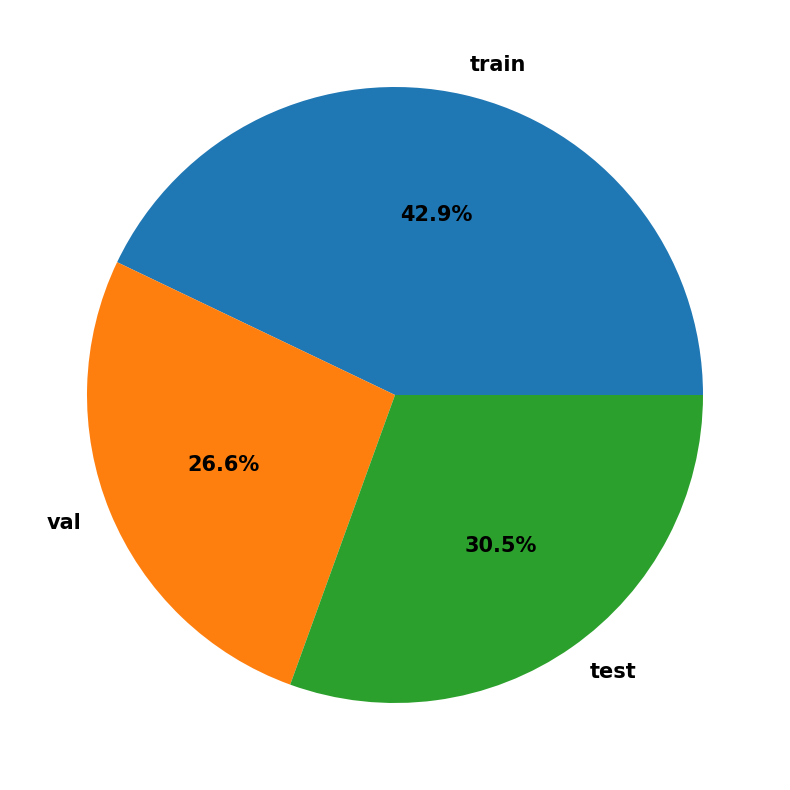

In [4]:
total_length = train_length + val_length + test_length
plt.figure(figsize=(10,10))

train_percentage = train_length/total_length
val_percentage = val_length/total_length
test_percentage = test_length/total_length


plt.pie([train_percentage, val_percentage, test_percentage], labels=['train','val','test'],autopct="%1.1f%%",textprops={'fontsize':15,'fontweight':'bold'})
plt.show()

# Annotations에서 필요한 것만 추출

In [9]:
output_train = {"annotations":[]}
for annotation in sta_train_json["annotations"]:
    obj = {
        "video_id": annotation["video_id"],
        "frame": annotation["frame"],
        "clip_id": annotation["clip_id"],
        "clip_uid": annotation["clip_uid"],
        "clip_frame": annotation["clip_frame"],
        "verb_category_id": annotation["objects"][0]["verb_category_id"],
        "noun_category_id": annotation["objects"][0]["noun_category_id"],
    }
    output_train["annotations"].append(obj)
with open('./annotations/my_annotations/fho_sta_train_refined.json','w') as f:
    json.dump(output_train,f)
output_val = {"annotations":[]}
for annotation in sta_val_json["annotations"]:
    obj = {
        "video_id": annotation["video_id"],
        "frame": annotation["frame"],
        "clip_id": annotation["clip_id"],
        "clip_uid": annotation["clip_uid"],
        "clip_frame": annotation["clip_frame"],
        "verb_category_id": annotation["objects"][0]["verb_category_id"],
        "noun_category_id": annotation["objects"][0]["noun_category_id"],
    }
    output_val["annotations"].append(obj)
with open('./annotations/my_annotations/fho_sta_val_refined.json','w') as f:
    json.dump(output_val,f)

# Video 개수세기

In [33]:
sta_train_video_ids=[]
for clip in output_train["annotations"]:
    sta_train_video_ids.append(clip["video_id"])
sta_train_video_ids=sorted(set(sta_train_video_ids))
print(len(sta_train_video_ids))

413


# 존재하는 clip id 정렬해보기

### 결론: 개수도 같고 클립id도 동일하다.

In [32]:
sta_train_clip_ids=[]
for clip in output_train["annotations"]:
    sta_train_clip_ids.append(clip["clip_id"])
sta_train_clip_ids=sorted(set(sta_train_clip_ids))

lta_train_clip_ids=[]
for clip in lta_train_json["clips"]:
    lta_train_clip_ids.append(clip["clip_id"])
lta_train_clip_ids=sorted(set(sta_train_clip_ids))

for a,b in zip(sta_train_clip_ids,lta_train_clip_ids):
    if a != b :
        print("non overlap occur")
print(len(sta_train_clip_ids))
print(len(lta_train_clip_ids))


491
491
